In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv("train.csv")

In [36]:
type(data)

pandas.core.frame.DataFrame

In [37]:
data.head()   # Shows first 5 data values

,Color,weight,Size,Fruit
0,B,100,20,C
1,G,1000,100,W
2,B,120,19,C
3,B,130,18,C
4,B,140,20,C


In [38]:
data.shape    # specfies the length of the data set rows and columns

(29, 4)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Color   29 non-null     object
 1   weight  29 non-null     int64 
 2   Size    29 non-null     int64 
 3   Fruit   29 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.0+ KB


In [40]:
data = data.values    # Values will convert pandas dataframe into numpy array

X = data[:,1:3]    #processed input data used for making predictions
Y = data[:,-1]    #predicted value

In [41]:
X.shape

(29, 2)

In [42]:
Y.shape

(29,)

In [43]:
X

array([[100, 20],
       [1000, 100],
       [120, 19],
       [130, 18],
       [140, 20],
       [2000, 101],
       [1005, 98],
       [100, 21],
       [1002, 102],
       [100, 15],
       [1002, 107],
       [1000, 94],
       [1000, 96],
       [1000, 97],
       [1202, 99],
       [130, 25],
       [109, 24],
       [100, 22],
       [100, 21],
       [1000, 97],
       [100, 21],
       [1002, 99],
       [100, 22],
       [1000, 99],
       [1012, 100],
       [1000, 101],
       [120, 25],
       [130, 19],
       [1401, 96]], dtype=object)

In [44]:
Y

array(['C', 'W', 'C', 'C', 'C', 'W', 'W', 'C', 'W', 'C', 'W', 'W', 'W',
       'W', 'W', 'C', 'C', 'C', 'C', 'W', 'C', 'W', 'C', 'W', 'W', 'W',
       'C', 'C', 'W'], dtype=object)

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()   #Calling the constructor of the label encoder
Y = le.fit_transform(Y)   #main method called for applying label encoder

In [46]:
Y

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1])

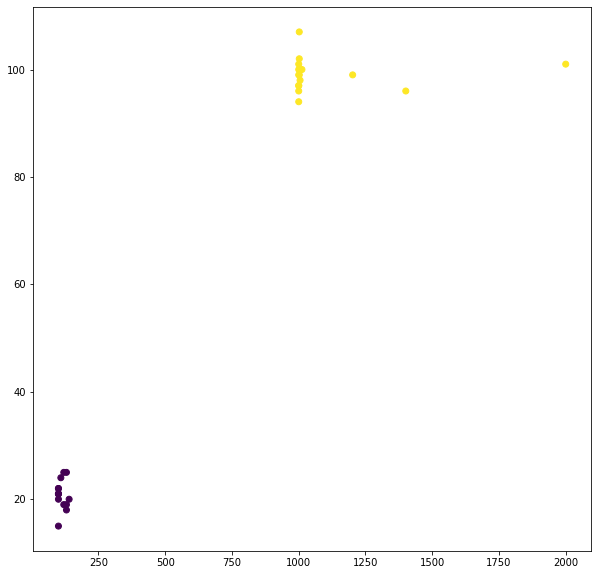

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1], c = Y)
plt.show()

In [85]:
def dist(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

In [99]:
def KNN(X, Y, queryPoint, k=5):
    vals = []    #Store all the distances of querypoint from X.
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint, X[i])
        vals.append([d,Y[i]])
        
    vals = sorted(vals)
    # Nearest / First k points
    nearest_points = vals[:k]
    nearest_points = np.array(nearest_points)
    new_vals = np.unique(nearest_points[:,1],return_counts=True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    if pred == 0:
        return "Coconut"
    else:
        return "Watermelon"
    
    

In [120]:
point = [500,100] #Watermelon

In [121]:
KNN(X,Y,point)

'Coconut'

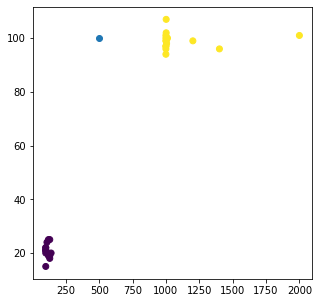

In [123]:
plt.figure(figsize=(5,5))
plt.scatter(point[0],point[1])
plt.scatter(X[:,0],X[:,1], c = Y)
plt.show()

In [ ]:
var[0][index]